In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
concrete = pd.read_csv('datasets/concrete_data.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.shape

(1030, 9)

In [4]:
concrete.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

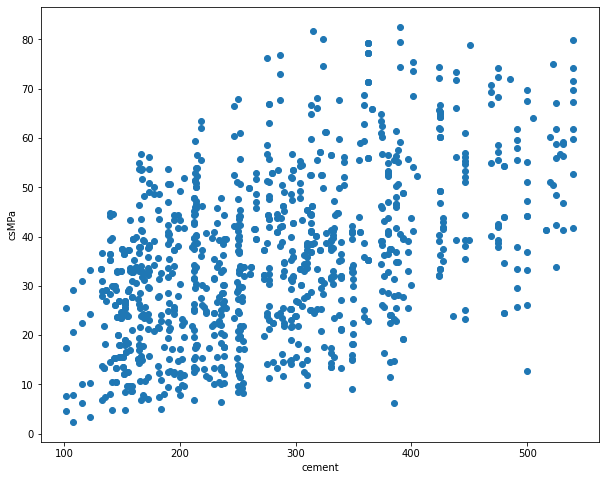

In [5]:
fig, ax = plt.subplots(figsize= (10,8))
plt.scatter(concrete['cement'], concrete['csMPa'])
plt.xlabel('cement')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

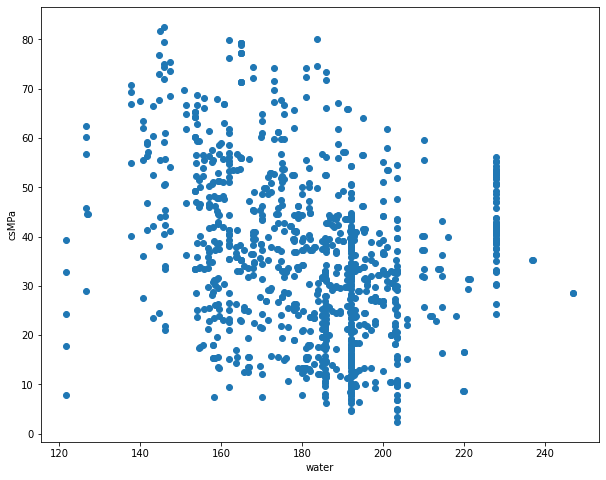

In [6]:
fig, ax = plt.subplots(figsize= (10,8))
plt.scatter(concrete['water'], concrete['csMPa'])
plt.xlabel('water')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

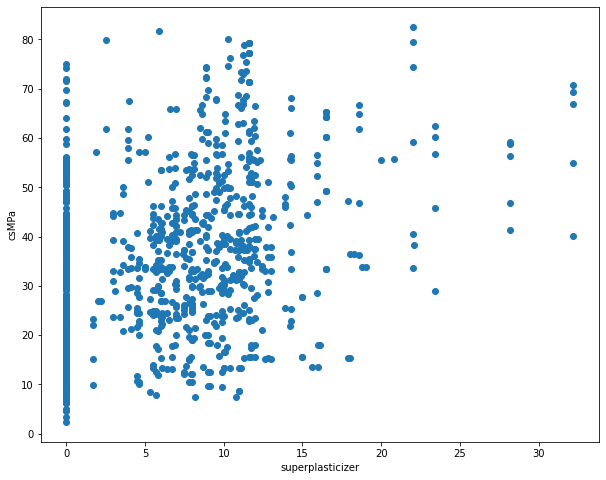

In [7]:
fig, ax = plt.subplots(figsize= (10,8))
plt.scatter(concrete['superplasticizer'], concrete['csMPa'])
plt.xlabel('superplasticizer')
plt.ylabel('csMPa')

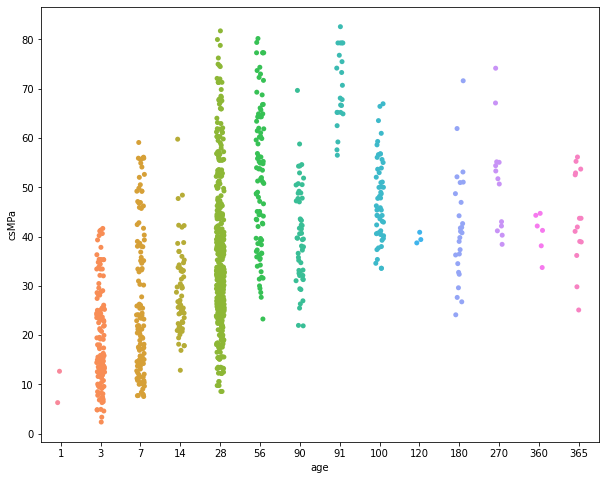

In [8]:
fig, ax = plt.subplots(figsize= (10,8))
sns.stripplot(concrete['age'], concrete['csMPa'])

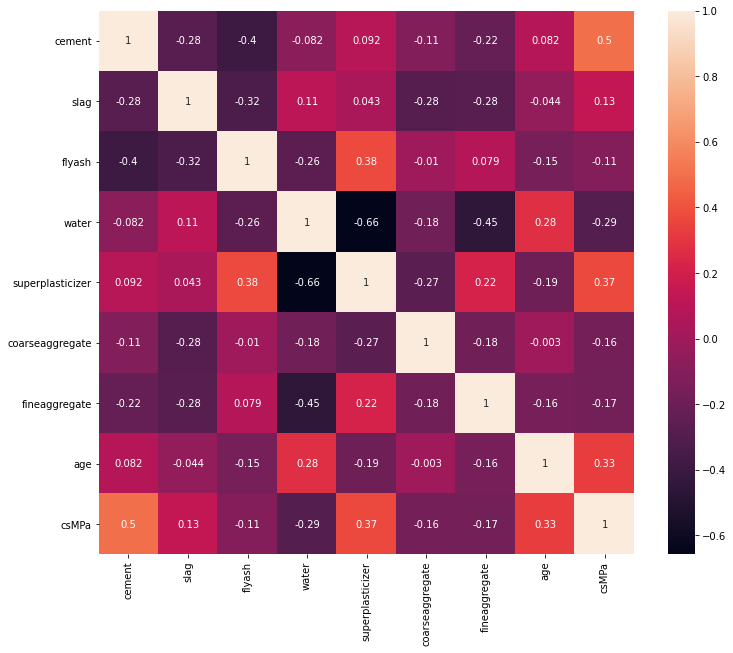

In [9]:
concrete_corr = concrete.corr()
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(concrete_corr, annot= True)

In [10]:
X = concrete.drop('csMPa', axis= 1)
Y = concrete['csMPa']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size= 0.2)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

### pasting

In [13]:
bag_reg =  BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators = 500,
                            bootstrap= False,
                            max_samples= 1.0,
                            n_jobs= -1)

In [16]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [17]:
y_pred = bag_reg.predict(x_test)

In [18]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df.sample(10)

,Actual,Predicted
185,24.45,24.85812
418,11.98,13.21732
622,36.15,34.49000
753,67.31,67.53102
548,25.57,18.66552
593,11.48,11.02226
376,31.97,36.32160
800,13.71,11.02226
536,39.60,32.38384
663,27.87,23.27932


In [19]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.797097252535595

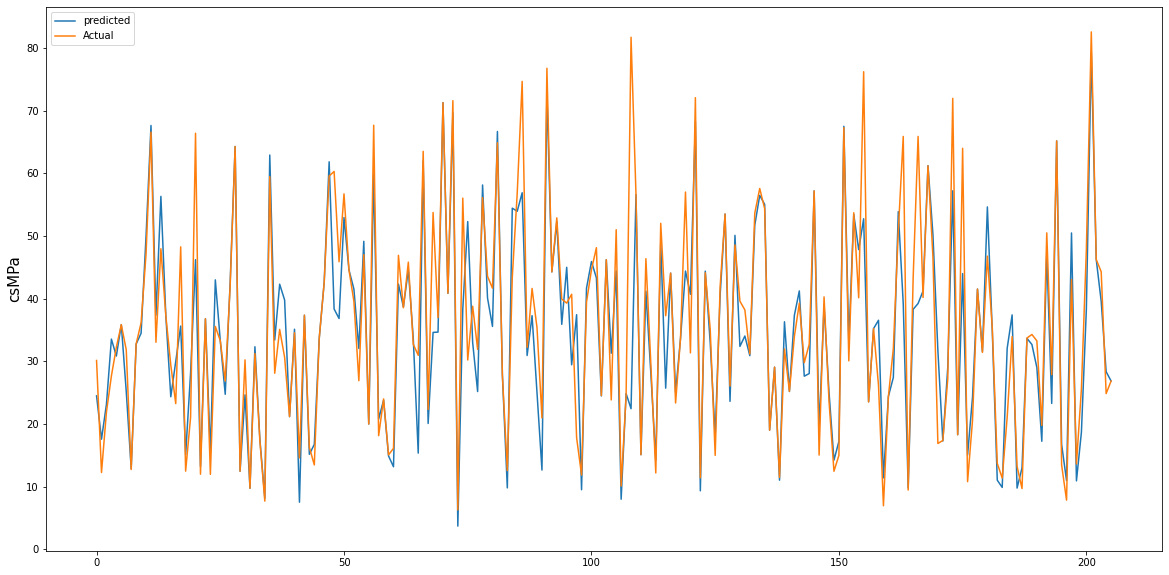

In [21]:
plt.figure(figsize= (20,10))

plt.plot(y_pred, label= 'predicted')
plt.plot(y_test.values, label= 'Actual')

plt.ylabel('csMPa', fontsize= 15)
plt.legend()

### bootsrap aggregation

In [22]:
bag_reg =  BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators = 500,
                            bootstrap= True,
                            max_samples= 0.8,
                            n_jobs= -1,
                            oob_score= True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [23]:
y_pred = bag_reg.predict(x_test)

In [24]:
bag_reg.oob_score_

0.9108346624270731

In [25]:
r2_score(y_test, y_pred)

0.8837394083172093

### random subspace

In [27]:
bag_reg =  BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators = 500,
                            bootstrap= False,
                            max_samples= 1.0,
                            bootstrap_features= True,
                            max_features= 0.8,
                            n_jobs= -1)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [28]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7826383940657119